In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
%config InlineBackend.figure_format = 'svg'


In [4]:
df = pd.read_csv("../data/telecom_churn.csv")

In [5]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [6]:
features = ['Total day minutes', 'Total intl calls']


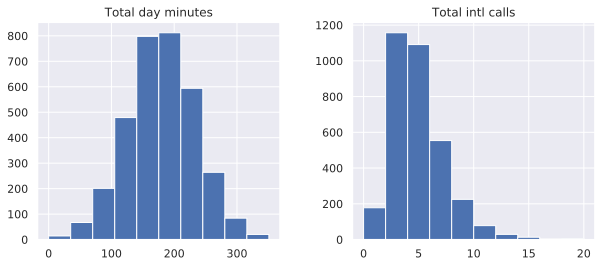

In [7]:
df[features].hist(figsize=(10, 4));


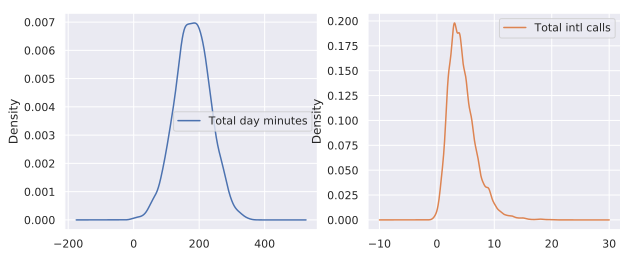

In [8]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));


/home/iii/opt/anaconda3/envs/ML/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


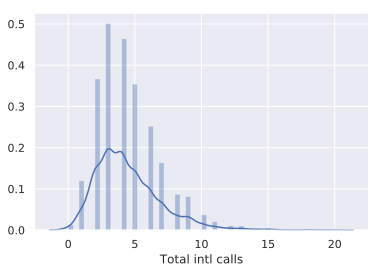

In [9]:
sns.distplot(df['Total intl calls']);

In [10]:
sns.distplot(df[('Total intl calls', )])

KeyError: ('Total intl calls',)

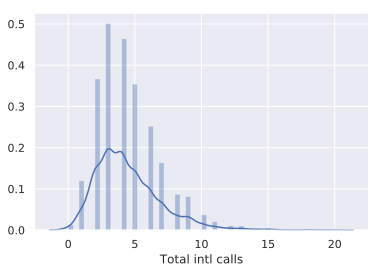

In [11]:
sns.distplot(df['Total intl calls'])

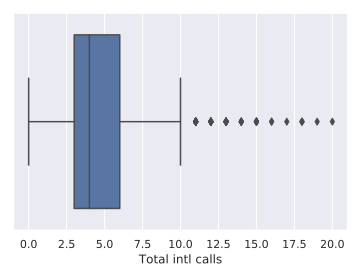

In [12]:
sns.boxplot(x='Total intl calls', data=df)

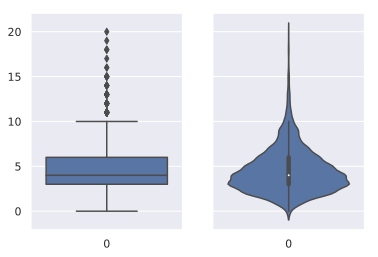

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);


In [14]:
df[features].describe()


Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [15]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

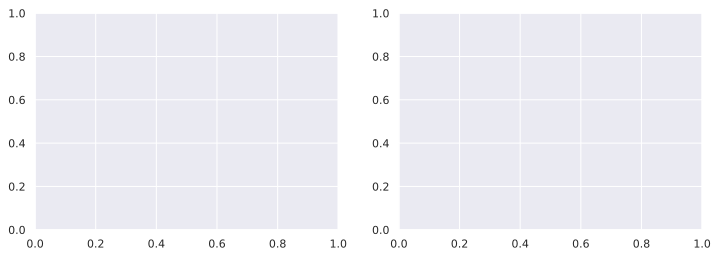

In [16]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


In [17]:
sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);


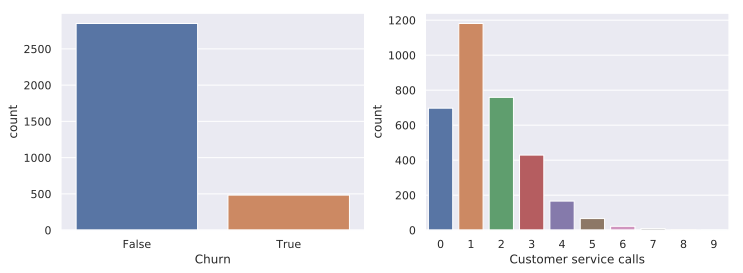

In [18]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);


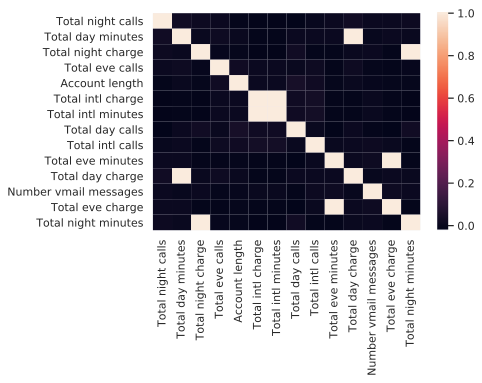

In [19]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)


In [20]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))


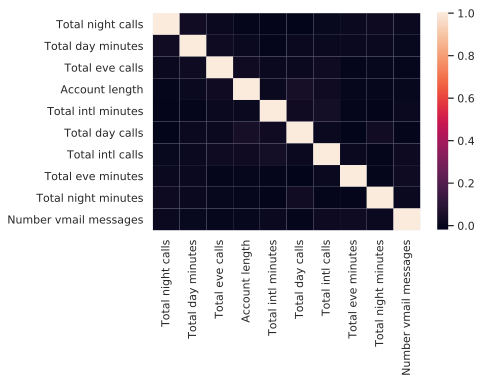

In [21]:
sns.heatmap(df[numerical].corr())

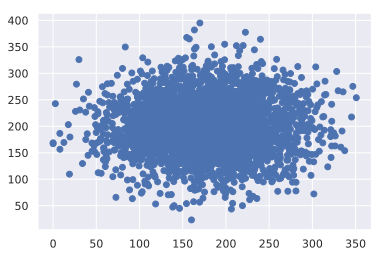

In [22]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);


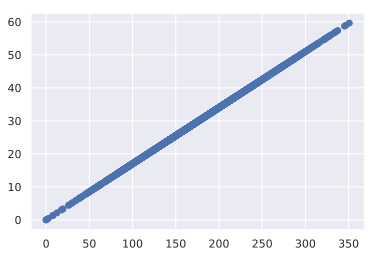

In [23]:
plt.scatter(df['Total day minutes'], df['Total day charge'])

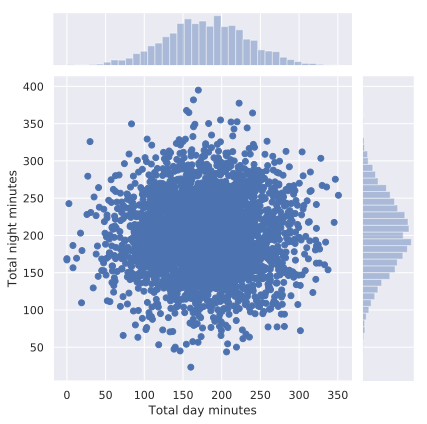

In [24]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

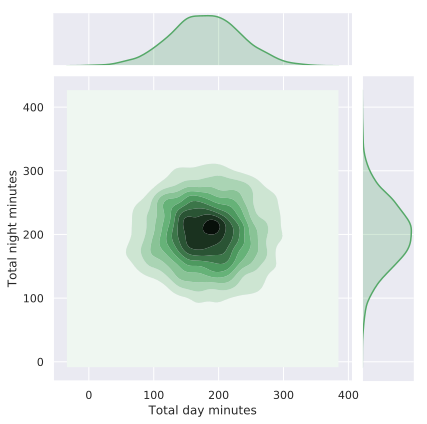

In [25]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

In [26]:
%config InlineBackend.figure_format = 'png'


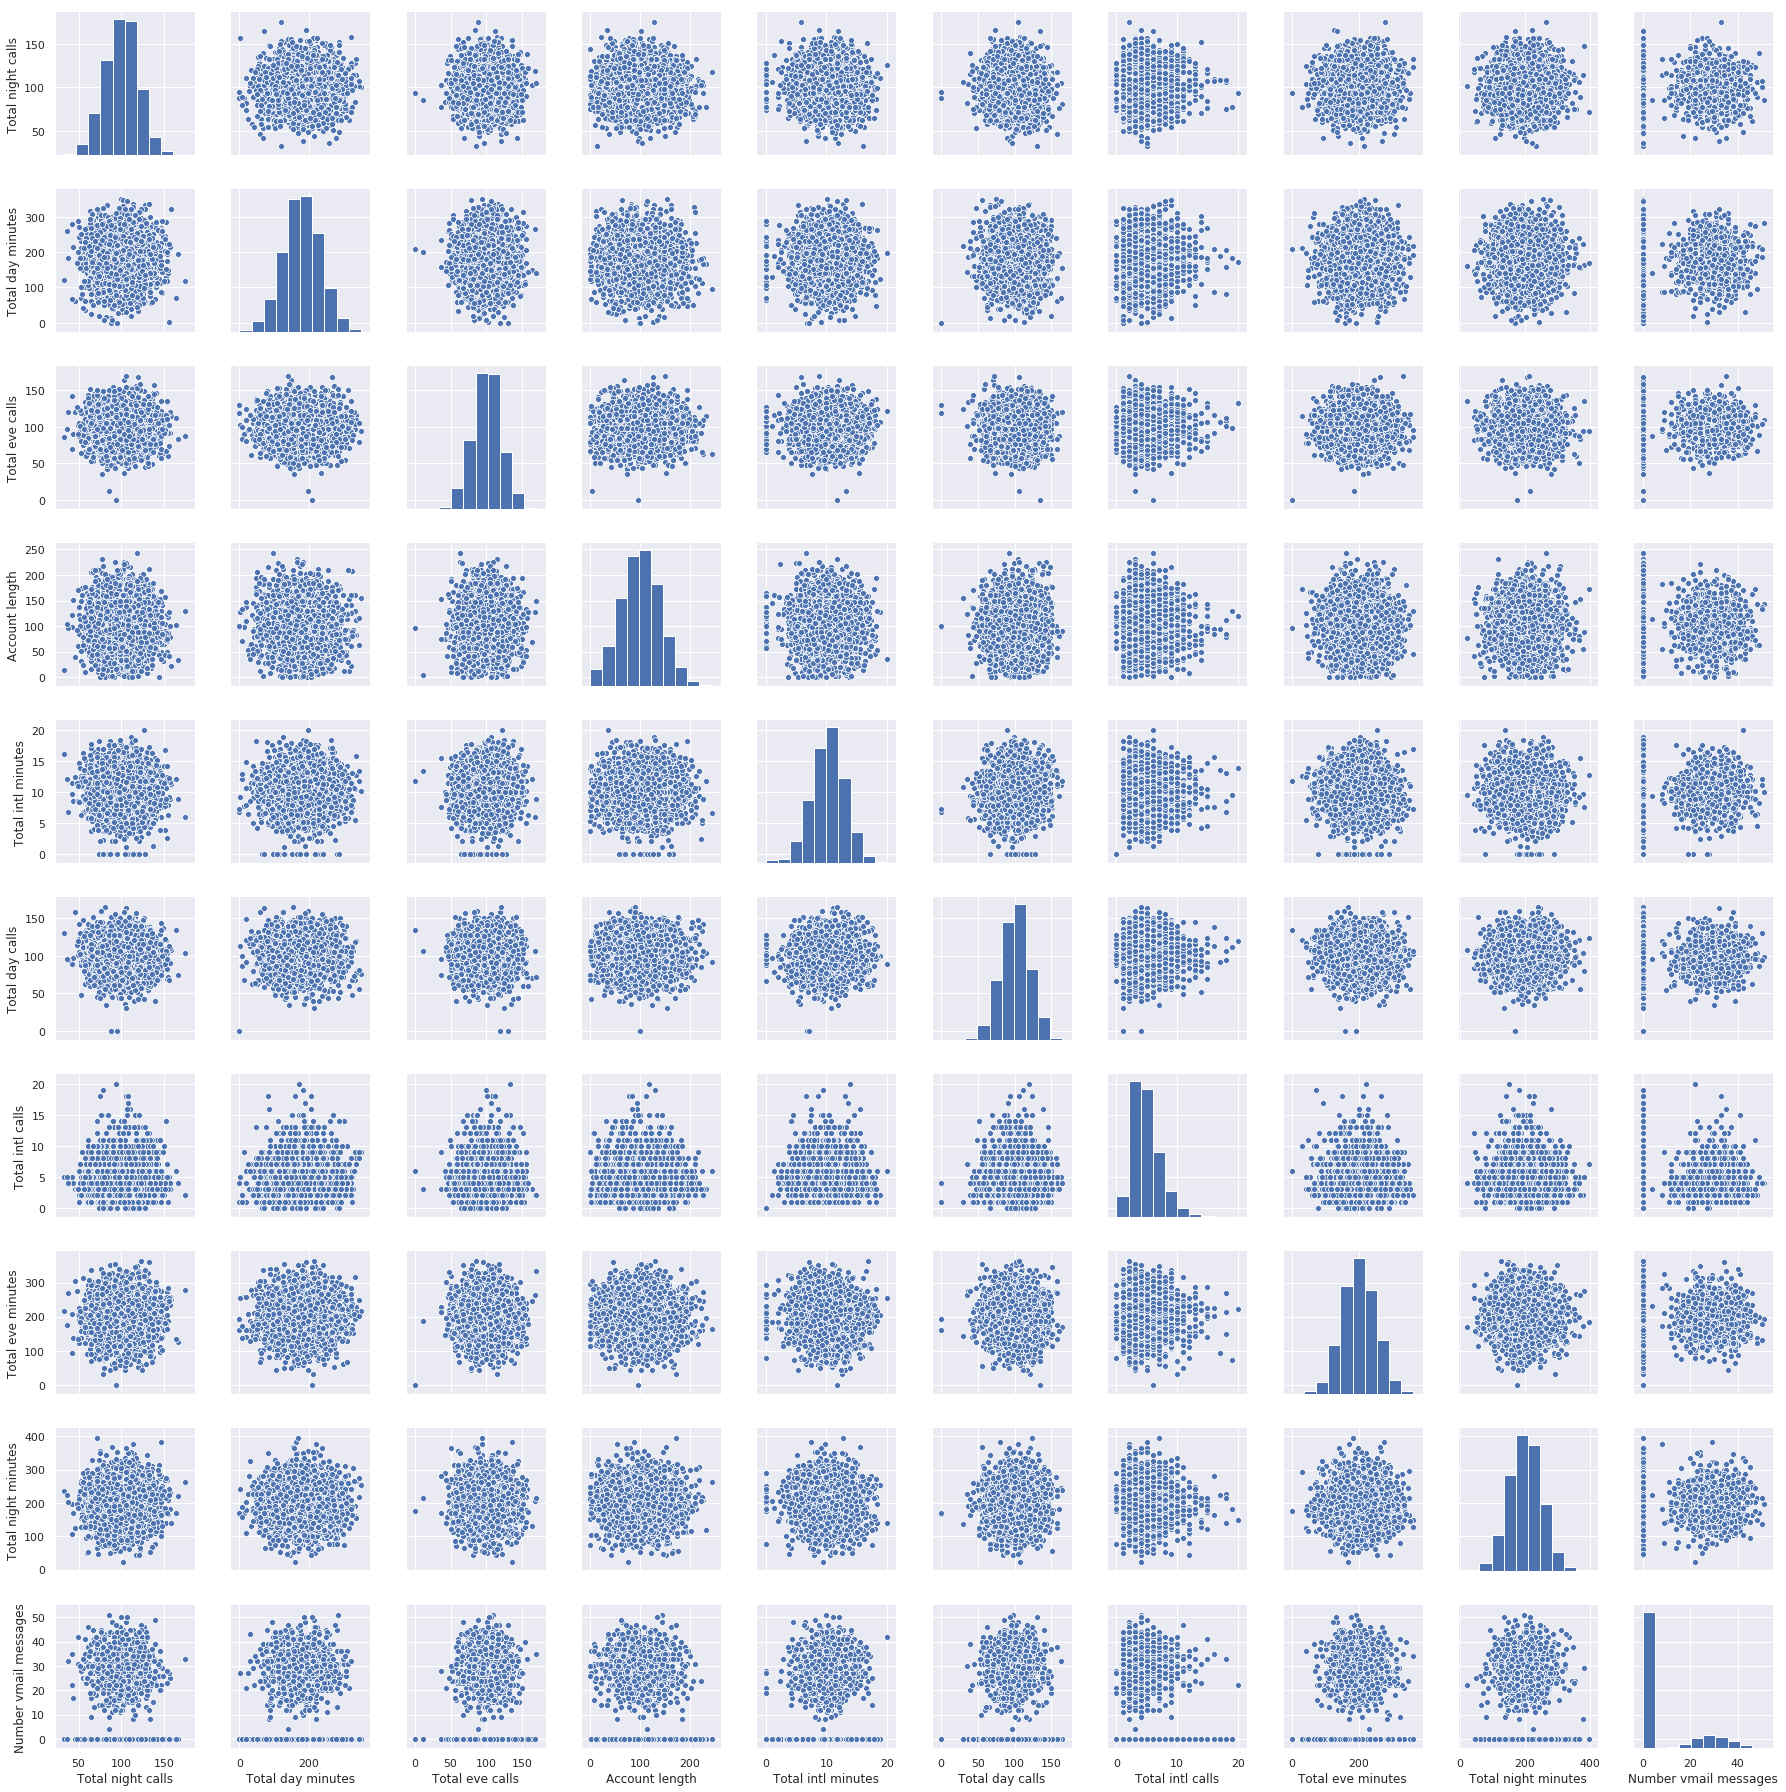

In [27]:
sns.pairplot(df[numerical])

In [28]:
%config InlineBackend.figure_format = 'svg'


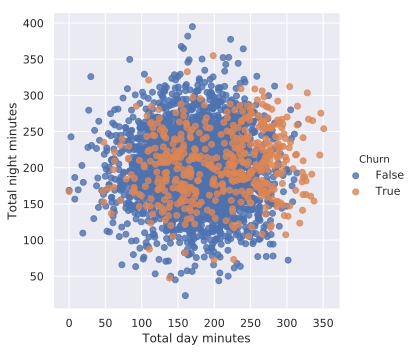

In [29]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);


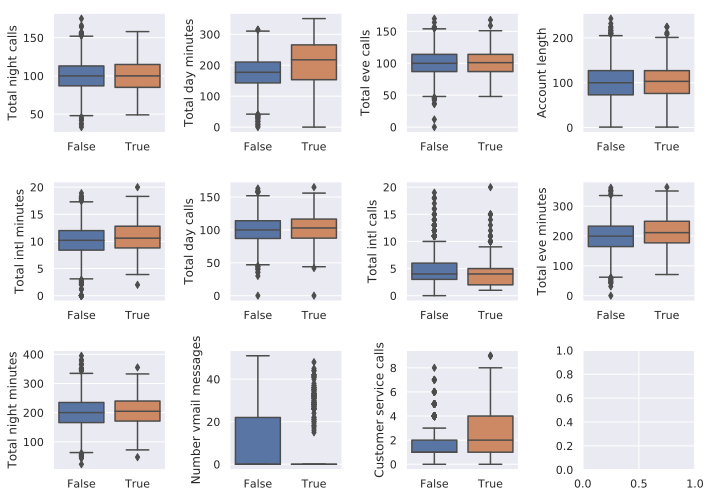

In [30]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();



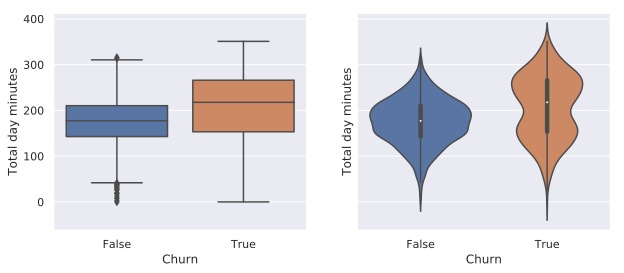

In [31]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);


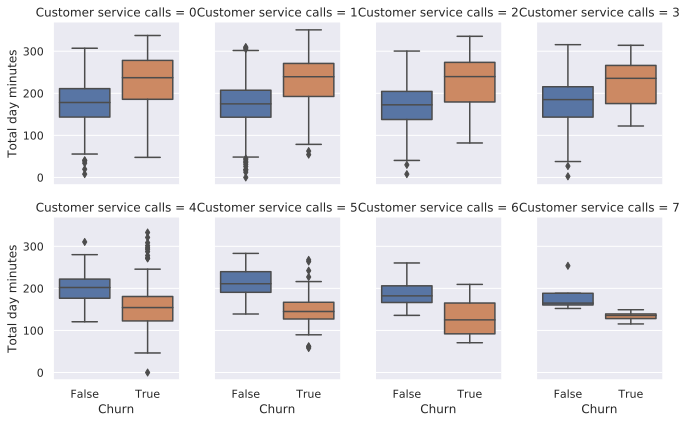

In [32]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);


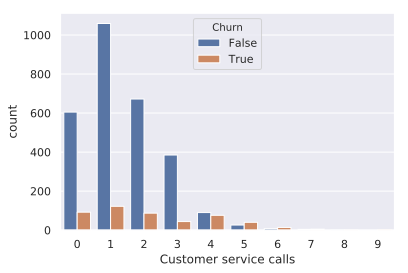

In [33]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);


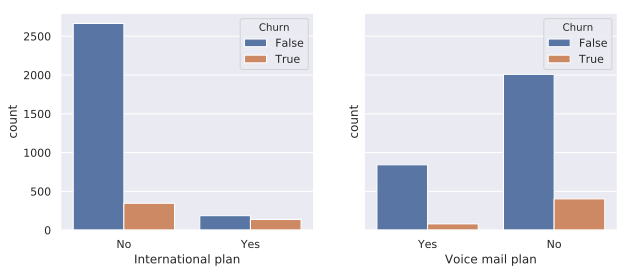

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);


In [35]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [36]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T


State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [37]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'sklearn'

In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [39]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/home/iii/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/iii/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)


CPU times: user 34.5 s, sys: 128 ms, total: 34.6 s
Wall time: 34.6 s


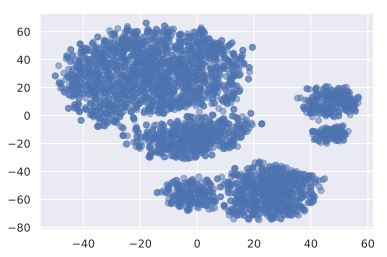

In [42]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);


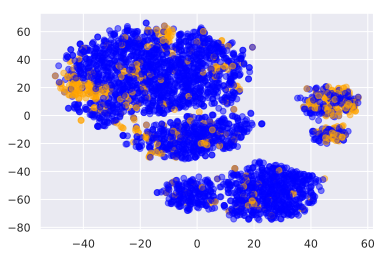

In [43]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);


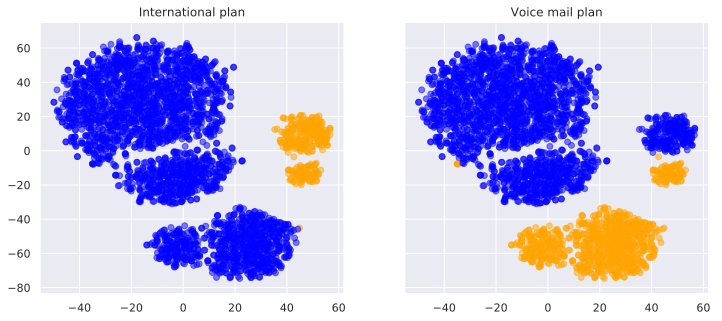

In [44]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);
